## Now I'll do looping:
1. 2 series
2. 2 models
3. multiple seq_length

----
   

### zoptymalizować treashold wykrywania anomalii (?)
### zmieniać learning rate optimizera  [0.005, 0.001]
### inna augumentacja przez przykład od Raschki

sprawdzić residua między tą wyplotowaną a augumentowaną czy nie wyszła jakaś dziwna/
dotrenowywanie na danych które się pojawiły (2 opcje: albo dotrenowujemy, albo nowa instancja i trenujemy na ostatnich np 100 próbkach)/

pisanie:/
1. wstęp: lstm, teoria szeregów czasowych, motywacja, stos technologiczny(tzn jakie biblioteki)
2. teoria: eksploracja danych + opis znaczenia wybranych zmiennych, trening forecasting
3. podsumowanie

skrót do usosa

włożyć do kodu licencję wszędzie jakąś tam 4.90 czy coś żeby można było kożystać
30 stron


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from NN_data_prep import set_seed, preprocess_series, prepare_dataset
from NN_models import LSTMForecaster, LSTMAttentionForecaster
from NN_model_usage import train_model, model_predict, detect_anomalies, plot_results, create_saving_path

In [2]:
param = 'puls'

df_aug = pd.read_csv('data/df_augmented_' + param + '.csv', parse_dates=['date'], date_format='%Y-%m-%d %H:%M:%S')
df_aug.set_index('date', inplace=True)
series_aug = df_aug['aug_series_00001']

df_original = pd.read_csv('data/df_stl_interpolated.csv', parse_dates=['date'], date_format='%Y-%m-%d %H:%M:%S')
df_original.set_index('date', inplace=True)
series_original = df_original[param]

In [3]:
print(series_aug.head(2))
print(series_original.head(2))

date
2023-11-13 14:00:00    112
2023-11-13 15:00:00    129
Name: aug_series_00001, dtype: int64
date
2023-11-13 14:00:00    125
2023-11-13 15:00:00    130
Name: puls, dtype: int64


In [4]:
# LSTMForecaster(),
# LSTMAttentionForecaster()

series_dict = {'series_original': series_original, 'series_aug': series_aug}
model_classes = [LSTMForecaster, LSTMAttentionForecaster]
seq_lengths = [2, 3, 5, 8, 12, 20]

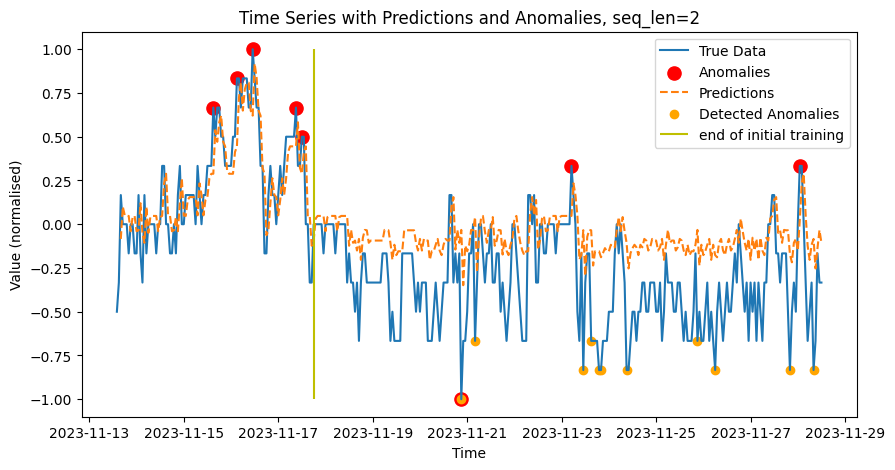

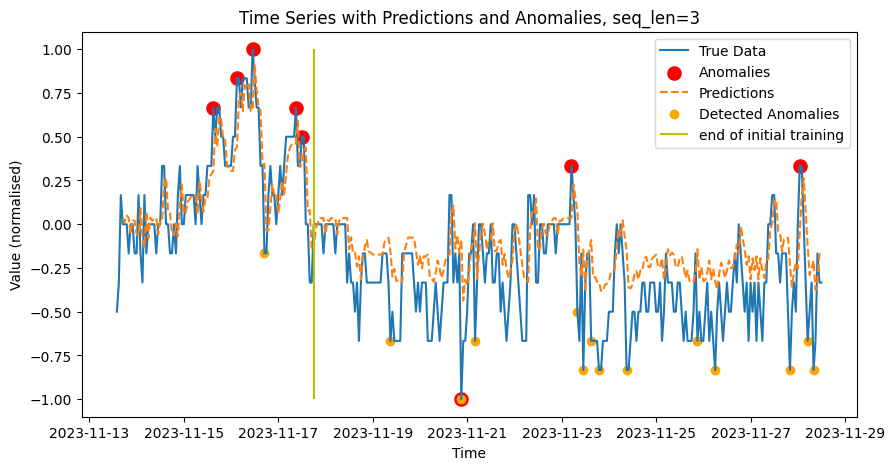

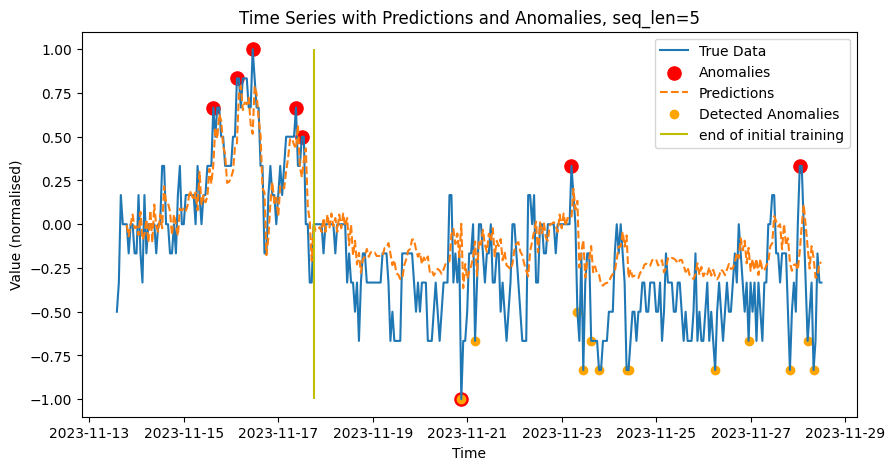

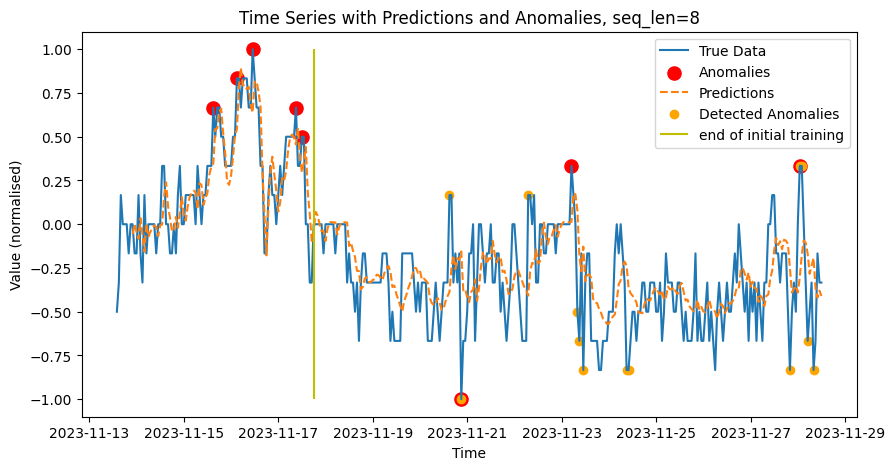

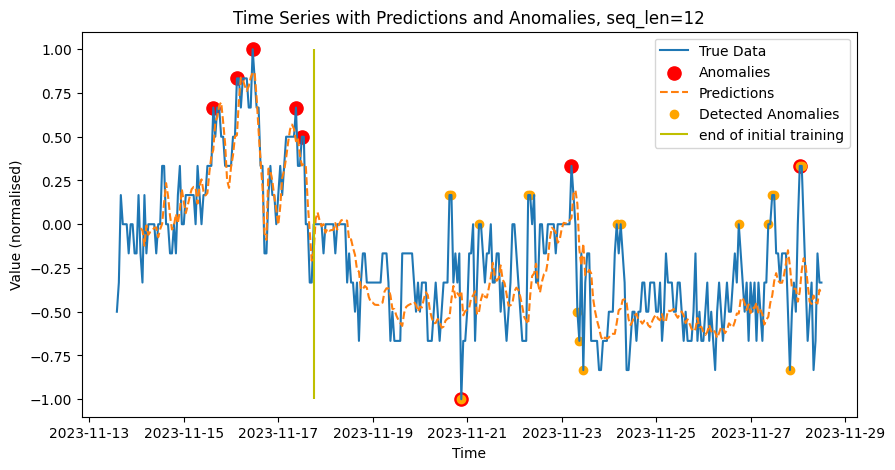

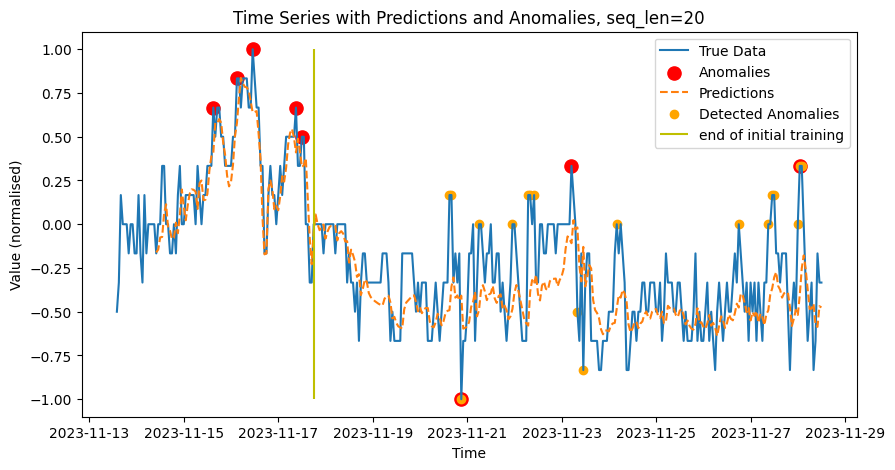

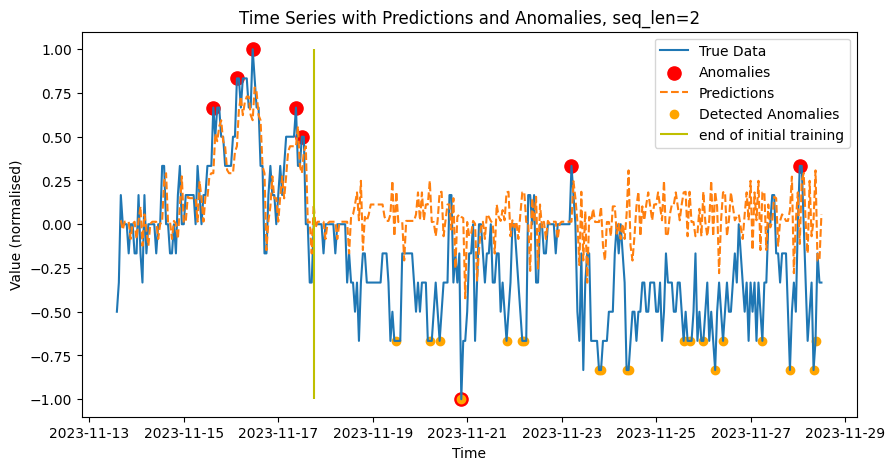

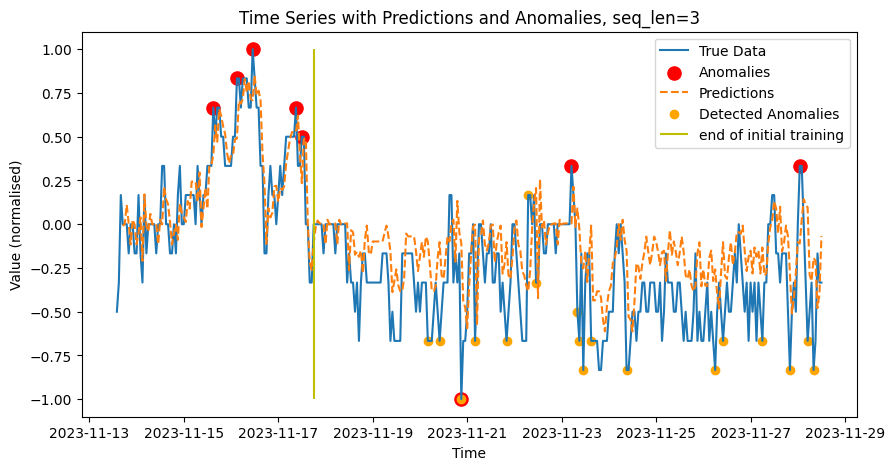

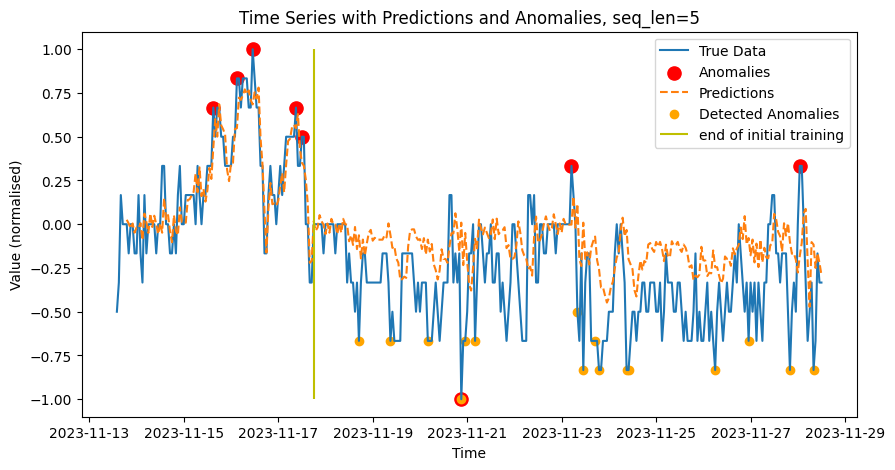

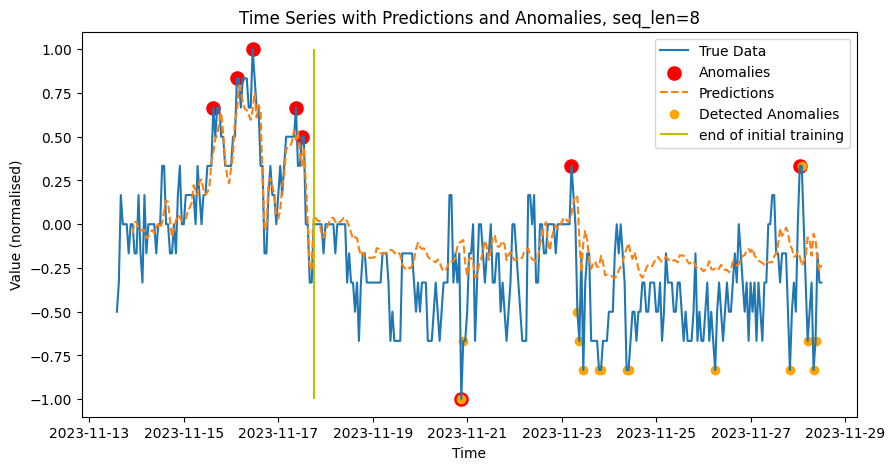

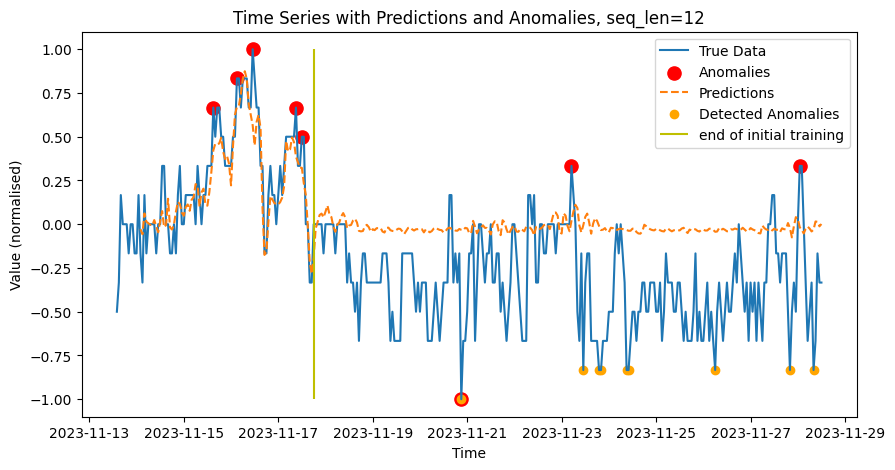

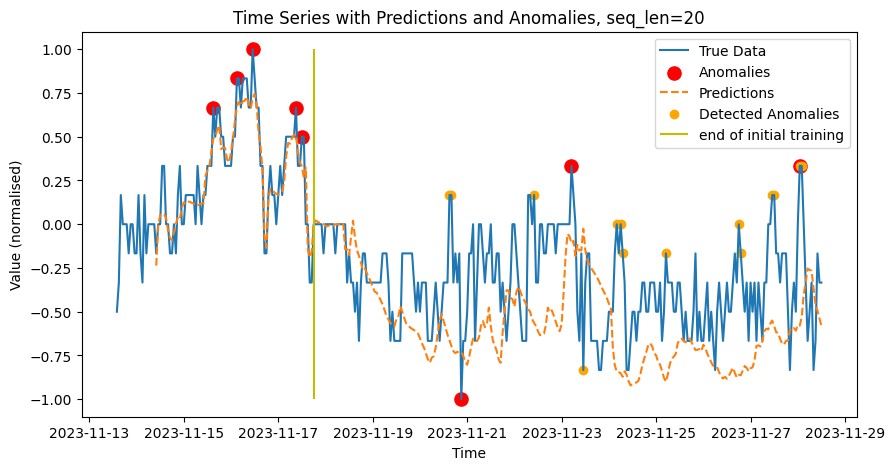

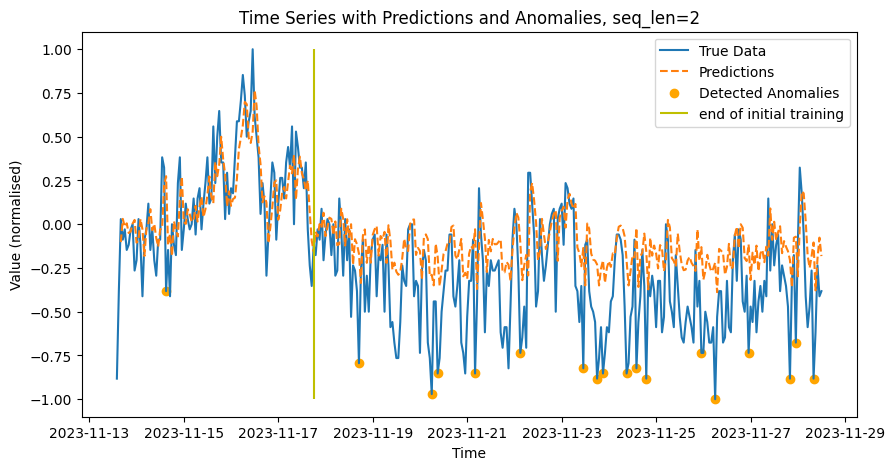

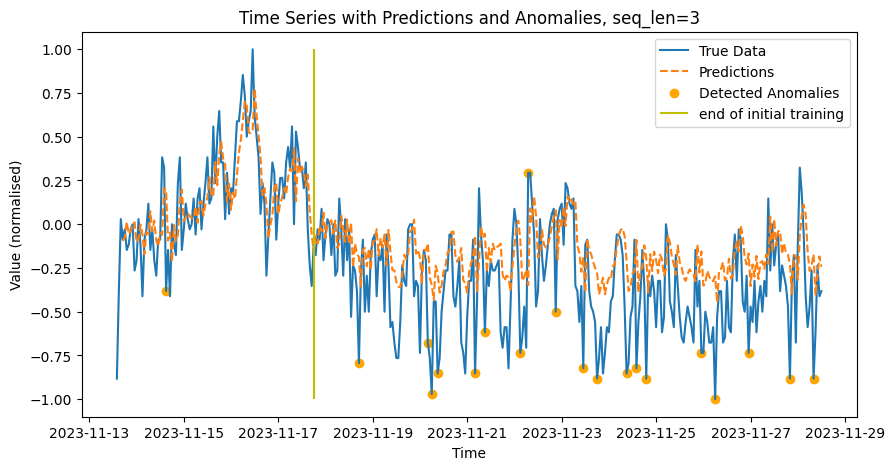

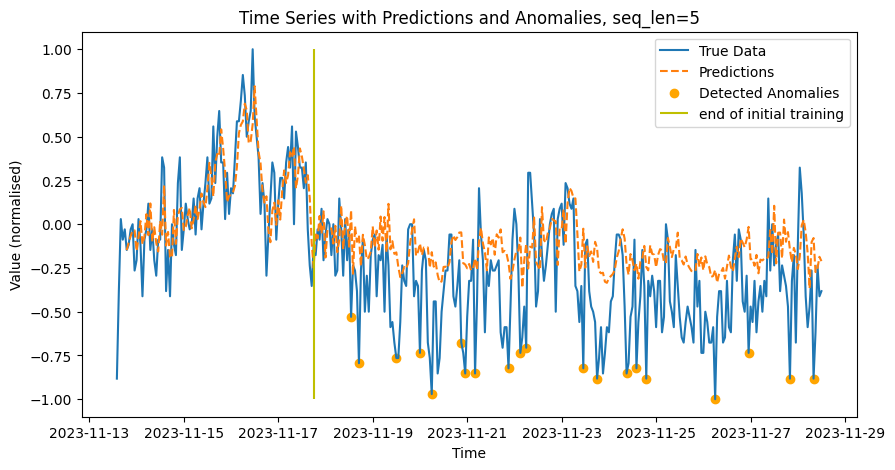

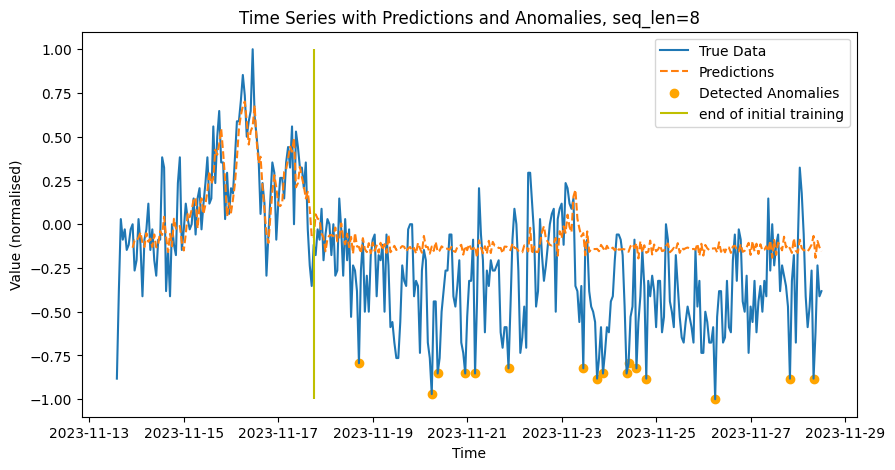

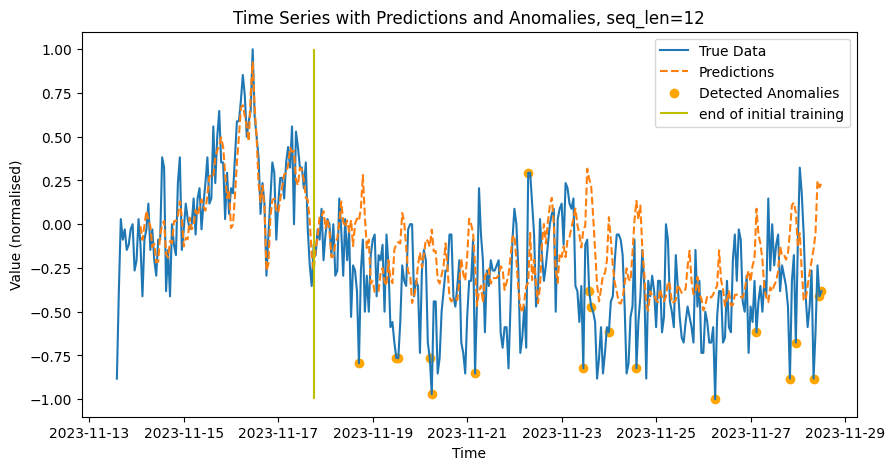

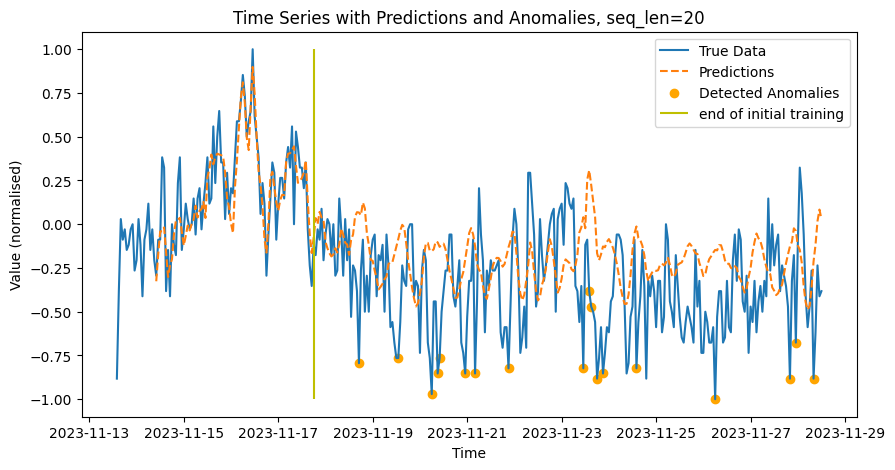

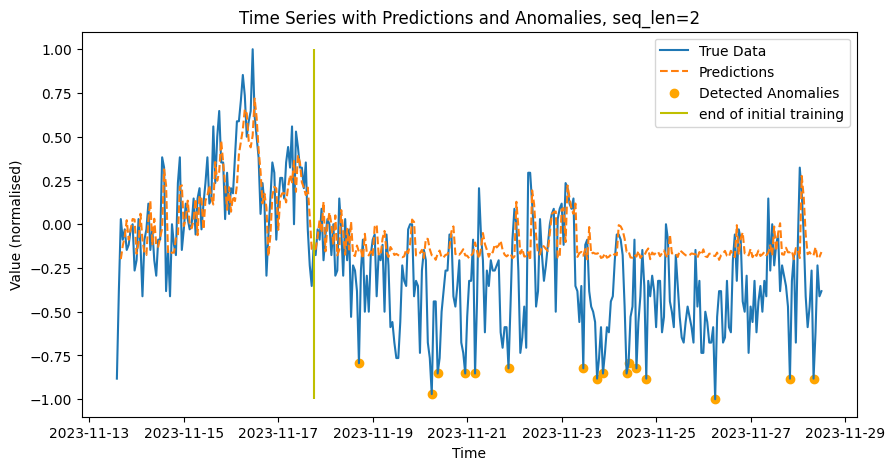

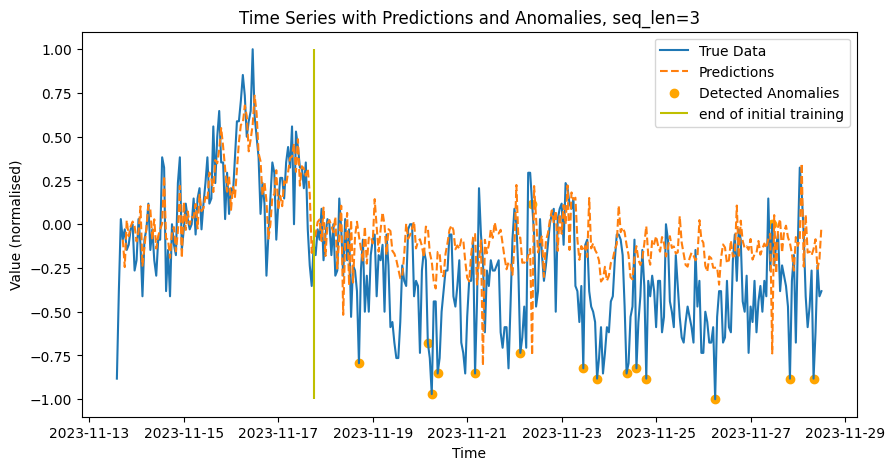

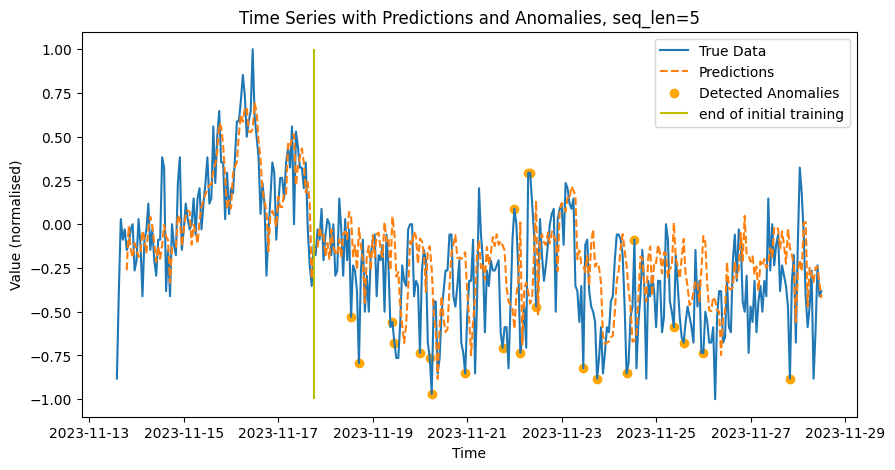

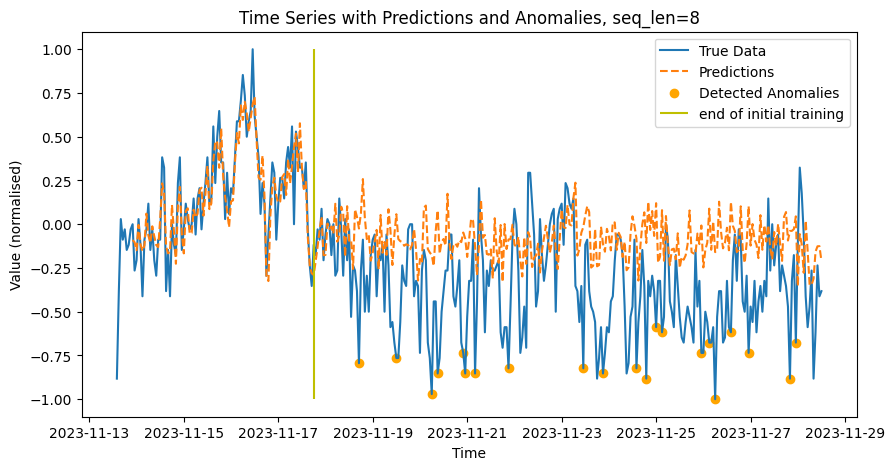

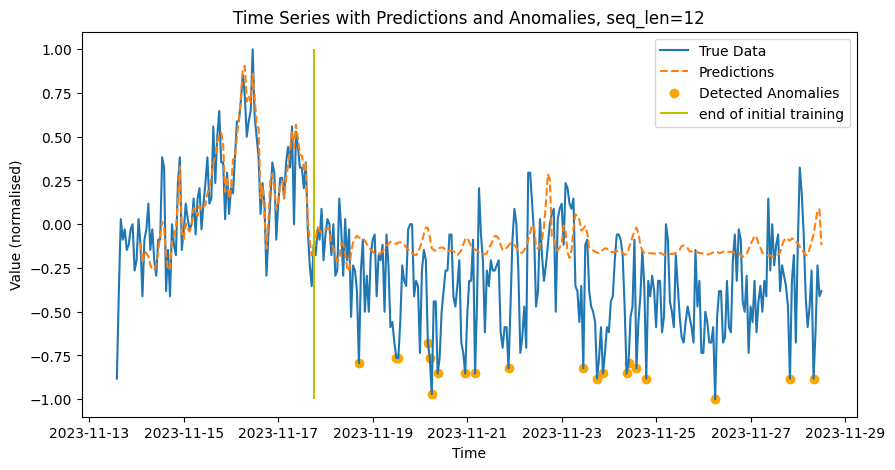

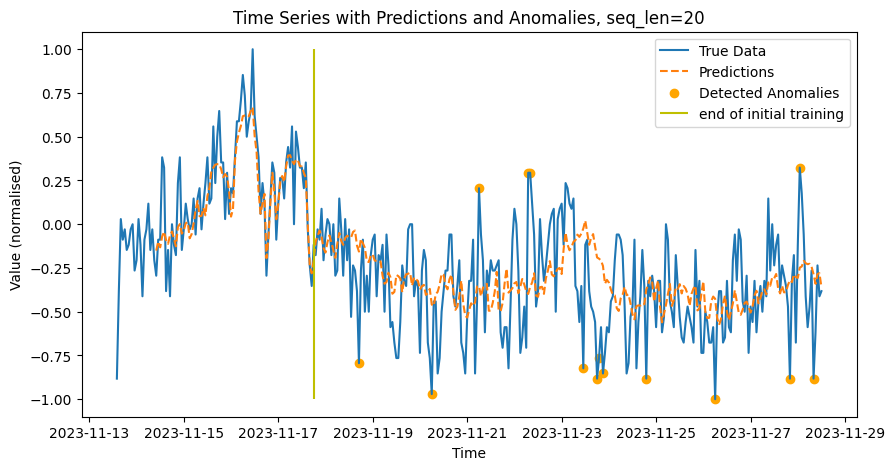

In [5]:
training_series_length = 100

for series_name, series in series_dict.items():
    for model_class in model_classes:
        x, y = preprocess_series(series)
        if series_name == 'series_original':
            anomalies = [49, 61, 69, 91, 94, 175, 231, 347]
        elif series_name == 'series_aug':
            anomalies = []
        for seq_len in seq_lengths:
            set_seed(42)
            model = model_class()
            X, Y = prepare_dataset(y, seq_len)
            train_model(model, X, Y, training_series_length)
            pred = model_predict(model, X)
            detected_anomalies = detect_anomalies(pred, Y, seq_len)
            saving_path = create_saving_path(model, seq_len, series_name, folder='11_forecaster_loop')
            plot_results(x, y, pred, anomalies, detected_anomalies, training_series_length, seq_len, saving_path)